In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# 과제 001

주어진 함수를 이용하여 gradient descent 를 직접 구현하고 그래프를 그리시오.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x):
    h = 0.001
    return (f(x+h) - f(x))/h
```

* 힌트: 교과서 44p를 **참고**

Text(0, 0.5, '$y=x^4-3x^3+2$')

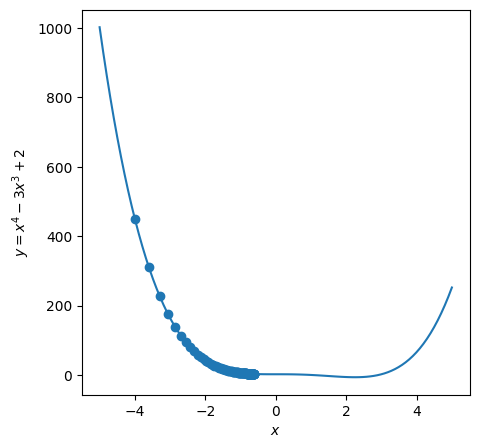

In [3]:
def f(x):
    return x**4 - 3*x**3 + 2

def fprime(x):
  h = 0.001
  return (f(x+h)-f(x))/h

all_x = tf.linspace(-5,5,100)
all_y = f(all_x)

x = tf.Variable(-4.) # 초기값 : x = -4
LR = 0.001

x_history, y_history = [], []
for _ in range(100):
  y = f(x)
  step = LR*fprime(x)

  x_history.append(x.numpy())
  y_history.append(y.numpy())

  x.assign_sub(step)  # x = x - lr*dx => 최소점을 향해 가기

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(all_x, all_y)
ax.scatter(x_history, y_history)
plt.xlabel('$x$')
plt.ylabel('$y=x^4-3x^3+2$')

# 과제 002

주어진 보스톤 주택 가격 데이터 셋을 이용하여 주택 가격을 예측하는 multiple variables regression 을 수행하는 프로그램을 직접 작성하시오.

단, 아래 조건을 만족하여 구현하시오.

* loss 함수: tensorflow 의 MSE
* gradient 계산: tensorflow의 GradientTape()
* optimizer: tensorflow의 Adam

**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```python
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
```

* 힌트:
https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/

4/4 [==============================] - 0s 6ms/step
[[ -96.8468   ]
 [  48.32348  ]
 [  76.95633  ]
 [  44.005127 ]
 [  75.860275 ]
 [  38.75057  ]
 [  51.31665  ]
 [  70.83162  ]
 [ 105.351364 ]
 [ -14.111196 ]
 [ -22.085455 ]
 [  76.3788   ]
 [  55.360615 ]
 [  86.44219  ]
 [ -35.183514 ]
 [  52.921986 ]
 [  41.962543 ]
 [  16.63255  ]
 [ -12.817314 ]
 [  -9.803963 ]
 [ -18.2379   ]
 [-112.38673  ]
 [  65.899086 ]
 [  65.74705  ]
 [  69.217316 ]
 [ -17.36933  ]
 [  68.66558  ]
 [ 104.18683  ]
 [ -89.35072  ]
 [  43.822502 ]
 [  40.212048 ]
 [ -84.231964 ]
 [  75.666504 ]
 [  40.018017 ]
 [ -21.597424 ]
 [ -10.804615 ]
 [  45.87691  ]
 [   9.768038 ]
 [ -10.466065 ]
 [  79.82431  ]
 [  87.95355  ]
 [  60.603558 ]
 [  -4.5904856]
 [  41.6904   ]
 [ 103.49804  ]
 [  89.55886  ]
 [  90.11301  ]
 [  69.77897  ]
 [  -7.8875623]
 [  64.40702  ]
 [  93.46291  ]
 [  67.49771  ]
 [  -6.556379 ]
 [  80.152115 ]
 [  47.50932  ]
 [  75.2104   ]
 [  -4.422551 ]
 [  77.64658  ]
 [  78.738106 ]
 [  8

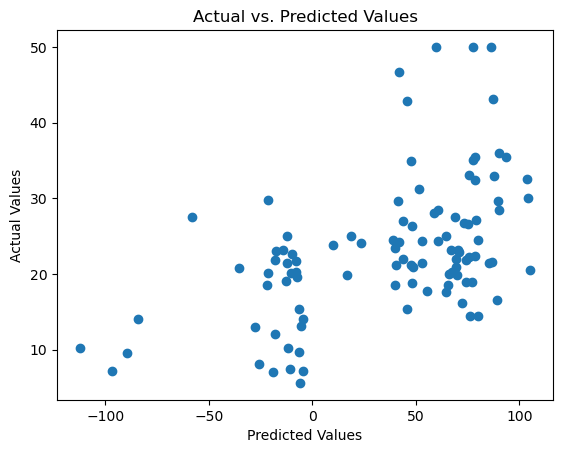

In [5]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 학습 데이터
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

# 학습 모델 불러오기
model = Sequential()
model.add(Dense(1, input_shape=(train_X.shape[1],)))

# 최소제곱오차 및 adam 학습
optimizer = tf.keras.optimizers.Adam()

# GradientTape() 적용
num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        predictions = model(train_X)
        loss = tf.reduce_mean(tf.square(predictions - train_Y))

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# 예측 모델
predictions = model.predict(test_X)
print(predictions)

# 산점도 작성
plt.scatter(predictions,test_Y)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Values')
plt.show()